In [ ]:
# importing the required libraries

import numpy as np
import pandas as pd


In [ ]:
# reading the dataset

df = pd.read_csv("/content/sample_data/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
# displaying the type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
# dimensions of data

df.shape

(400, 5)

In [ ]:
# displaying the statistical means of the data

df.describe

<bound method NDFrame.describe of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [ ]:

df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
# checking null values if any in data

df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:
df.drop('Gender',inplace=True,axis=1)

In [ ]:
df

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0
...,...,...,...,...
395,15691863,46,41000,1
396,15706071,51,23000,1
397,15654296,50,20000,1
398,15755018,36,33000,0


In [ ]:
# to train the data and for testing we seperate the categorical data as dependent and independant

X = df.drop('Purchased',axis=1)
Y = df['Purchased']

In [ ]:
X

,User ID,Age,EstimatedSalary
0,15624510,19,19000
1,15810944,35,20000
2,15668575,26,43000
3,15603246,27,57000
4,15804002,19,76000
...,...,...,...
395,15691863,46,41000
396,15706071,51,23000
397,15654296,50,20000
398,15755018,36,33000


In [ ]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [ ]:
# importing sklearn library and doing the train and test split on X and Y

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)
X_train,X_test

(      User ID  Age  EstimatedSalary
 92   15809823   26            15000
 223  15593715   60           102000
 234  15619407   38           112000
 232  15813113   40           107000
 377  15800215   42            53000
 ..        ...  ...              ...
 323  15619465   48            30000
 192  15779581   29            43000
 117  15591433   36            52000
 47   15776348   27            54000
 172  15794661   26           118000
 
 [280 rows x 3 columns],       User ID  Age  EstimatedSalary
 132  15725660   30            87000
 309  15652400   38            50000
 341  15776844   35            75000
 196  15738448   30            79000
 246  15638003   35            50000
 ..        ...  ...              ...
 216  15636023   49            65000
 259  15815236   45           131000
 49   15793813   31            89000
 238  15617877   46            82000
 343  15629739   47            51000
 
 [120 rows x 3 columns])

In [ ]:
# using Standard Scaler() method we transform the data

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [ ]:
X_train

array([[ 1.67118864e+00, -1.16317240e+00, -1.58497030e+00],
       [-1.38839503e+00,  2.17018137e+00,  9.30986724e-01],
       [-1.02465642e+00,  1.33054037e-02,  1.22017719e+00],
       [ 1.71776734e+00,  2.09385037e-01,  1.07558195e+00],
       [ 1.53516184e+00,  4.05464670e-01, -4.86046541e-01],
       [-1.05683679e+00, -2.80814046e-01, -3.12532264e-01],
       [ 3.23874887e-01,  9.93703570e-01, -8.33075096e-01],
       [ 1.46554862e+00,  9.93703570e-01,  1.85639620e+00],
       [ 1.53940914e+00,  1.33054037e-02,  1.24909623e+00],
       [ 1.38792217e+00, -8.69052946e-01,  2.26126285e+00],
       [-1.71742331e-01, -1.16317240e+00, -1.58497030e+00],
       [-7.91253235e-01,  2.17018137e+00, -8.04156050e-01],
       [-1.70199146e-01, -1.35925203e+00, -1.46929411e+00],
       [ 1.38112224e-01,  4.05464670e-01,  2.29018190e+00],
       [-3.55452132e-01,  7.97623937e-01,  7.57472446e-01],
       [-1.39831955e+00, -9.67092763e-01, -3.12532264e-01],
       [-9.79663379e-01,  1.11345220e-01

In [ ]:
X_test.shape

(120, 3)

In [ ]:
#using LogisticRegression() method we create the model and 
#fit the data for predicting the tested results

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# using the predict method we pass the X_test variable 

y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# calculating accuracy score 

score = accuracy_score(y_test,y_predict)
score

0.8833333333333333

In [ ]:
# importing confusion matrix and displaying the results.

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[75,  4],
       [10, 31]])

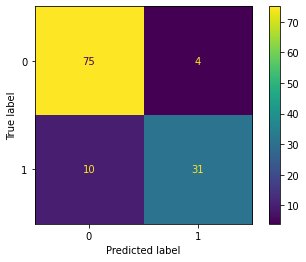

In [ ]:
# plotting the confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm).plot()

In [ ]:
# confusion matrix in terms of True negative,false positive,
#false negative and true positive.

tn,fp,fn,tp = confusion_matrix(y_test,y_predict).ravel()
tn,fp,fn,tp

(75, 4, 10, 31)

In [ ]:
from sklearn.metrics import precision_score,recall_score


In [ ]:
# calculating recall score

"""
the ratio tp / (tp + fn)
"""
rs=recall_score(y_test,y_predict)
rs


0.7560975609756098

In [ ]:
# calculating precision score

"""
the ratio tp / (tp + fp)
"""
ps=precision_score(y_test,y_predict)
ps

0.8857142857142857

In [ ]:
x_new = [[15594041,49,36000]]

x_new=std.transform(x_new)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
x_new1 = [[15594041,49,36000]]
std1=StandardScaler()
x_new1=std1.fit_transform(x_new1)
x_new1

array([[0., 0., 0.]])

In [ ]:
y_new = model.predict(x_new1)

In [ ]:
y_new

array([0])